# Testing performance non-regression on Grid'5000 clusters

In [1]:
csv_url = 'https://gitlab.in2p3.fr/tom.cornebize/g5k_data/raw/master/stats.csv'
changelog_url = 'https://gitlab.in2p3.fr/tom.cornebize/g5k_data/raw/master/exp_changelog.csv'
cluster = 'yeti'

In [2]:
%load_ext autoreload
%autoreload 2
import requests
import pandas
import io

In [3]:
import non_regression_tests as nrt

df = nrt.format(nrt.get(csv_url))

2020-02-17 15:33:41,821 - non_regression_tests - INFO - Downloaded a dataframe with 43372 rows and 26 columns


In [4]:
changelog = nrt.format_changelog(nrt.get(changelog_url))

2020-02-17 15:33:42,092 - non_regression_tests - INFO - Downloaded a dataframe with 4 rows and 5 columns


In [5]:
df = nrt.filter(df, cluster=cluster)

2020-02-17 15:33:42,115 - non_regression_tests - INFO - Filtered the dataframe, there remains 1352 rows


In [6]:
df.head()

,function,cluster,node,cpu,jobid,start_time,expfile_hash,avg_gflops,intercept,intercept_residual,...,nk_residual,tvalue_mk,tvalue_mk_residual,tvalue_mn,tvalue_mn_residual,tvalue_mnk,tvalue_mnk_residual,tvalue_nk,tvalue_nk_residual,timestamp
898,dgemm,yeti,2,0,1872765,1562246901,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,29.854725,0.000002,2.192125e-07,...,2.150987e-11,64.184200,4.603520,6.840312,0.759295,970.567569,18.025490,112.527596,6.089465,2019-07-04 13:28:21
899,dgemm,yeti,2,1,1872765,1562246901,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,30.005371,0.000002,2.638218e-07,...,2.347604e-11,64.592362,18.672799,6.963368,5.213087,995.216802,33.990793,116.950956,19.387172,2019-07-04 13:28:21
900,dgemm,yeti,2,2,1872765,1562246901,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,29.847841,0.000002,5.174516e-07,...,2.527422e-11,64.555504,15.141964,6.584820,2.884693,973.518237,31.197886,112.994926,17.009700,2019-07-04 13:28:21
901,dgemm,yeti,2,3,1872765,1562246901,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,29.962051,0.000002,3.020797e-07,...,1.778092e-11,63.817317,24.278044,6.895777,6.337616,978.274468,30.609007,116.471158,17.167837,2019-07-04 13:28:21
902,dgemm,yeti,4,0,1872767,1562246922,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,29.974734,0.000002,2.187042e-07,...,2.479928e-11,64.232367,22.646177,6.763787,5.083738,970.743669,26.084671,115.516372,19.914854,2019-07-04 13:28:42


2020-02-17 15:33:42,200 - non_regression_tests - INFO - Filtered the dataframe, there remains 16 rows


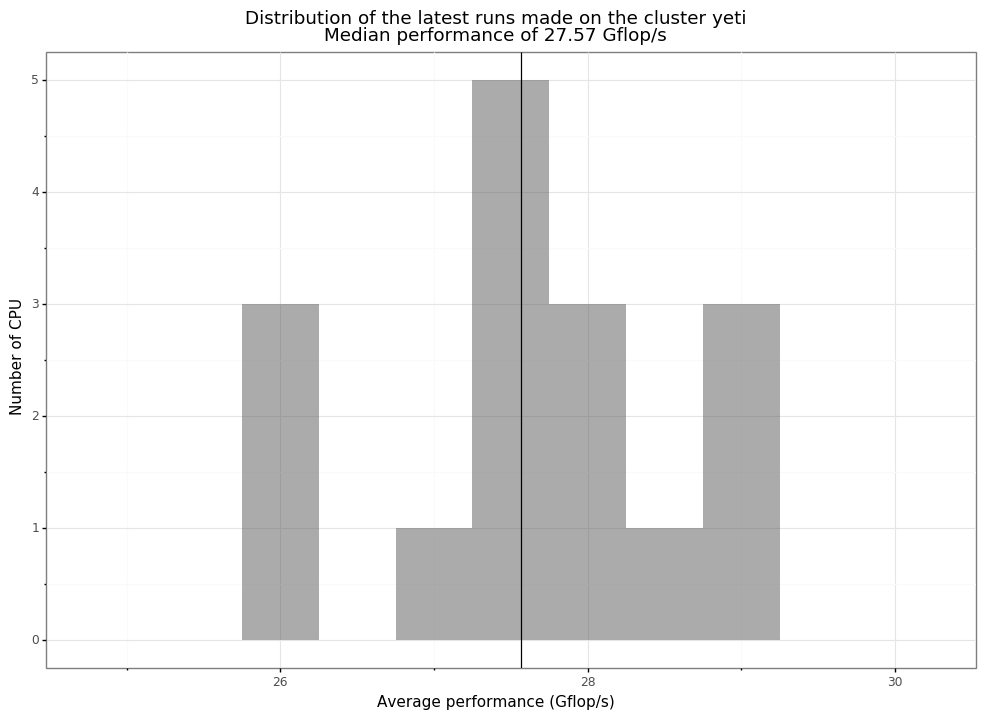

<ggplot: (8761199060684)>

In [7]:
nrt.plot_latest_distribution(df)

In [8]:
marked=nrt.mark_weird(df, select_func=lambda x: nrt.select_first_n_changelog(x, changelog), nb_sigma=2.236477)  # qnorm(1-(1-sqrt(1-0.05))/2,sd=1) == 2.236477
marked.groupby('weird')[['timestamp']].count()

,timestamp
weird,
False,882
True,134
NA,336


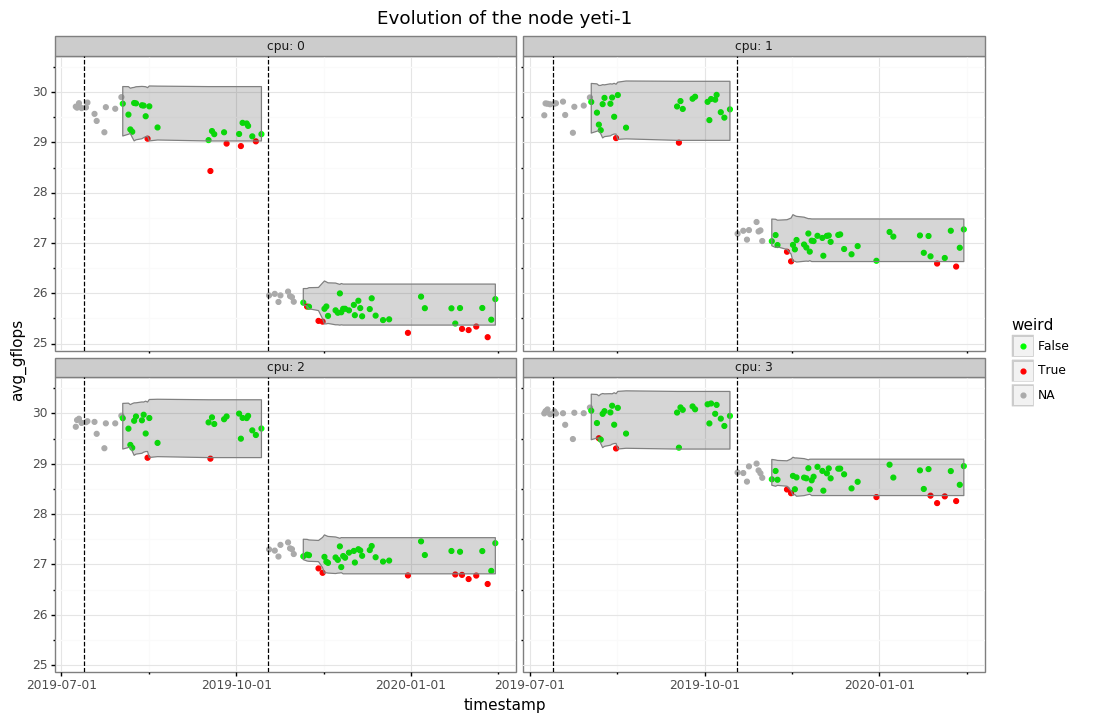

<ggplot: (8761198016397)>


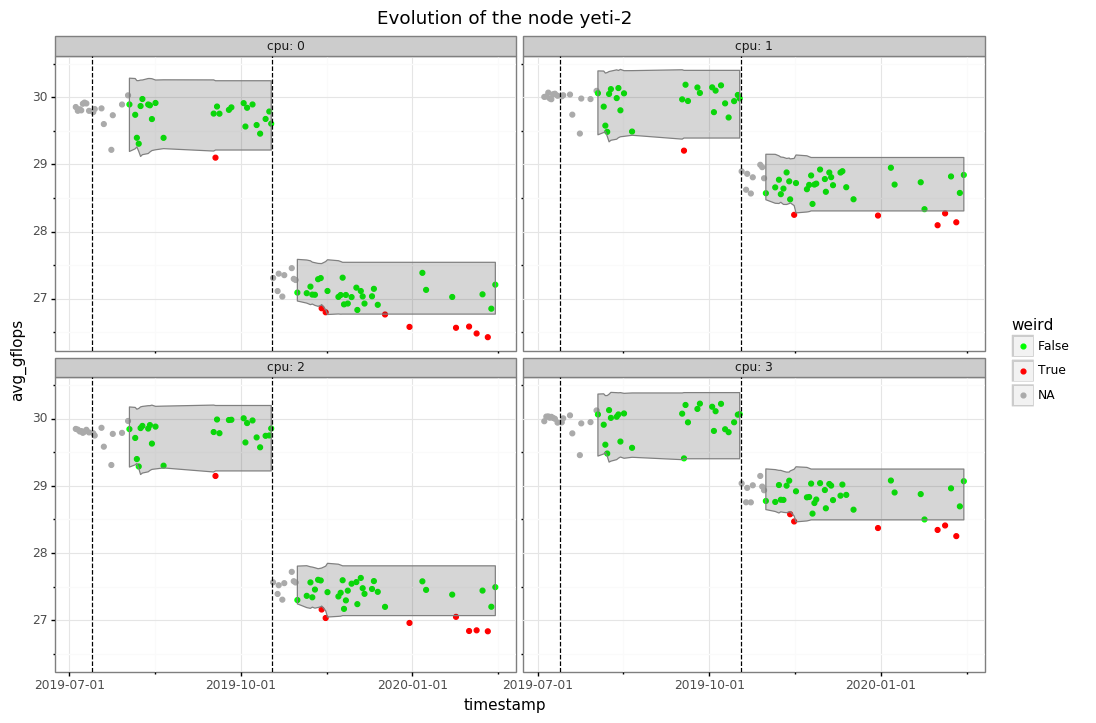

<ggplot: (8761191948008)>


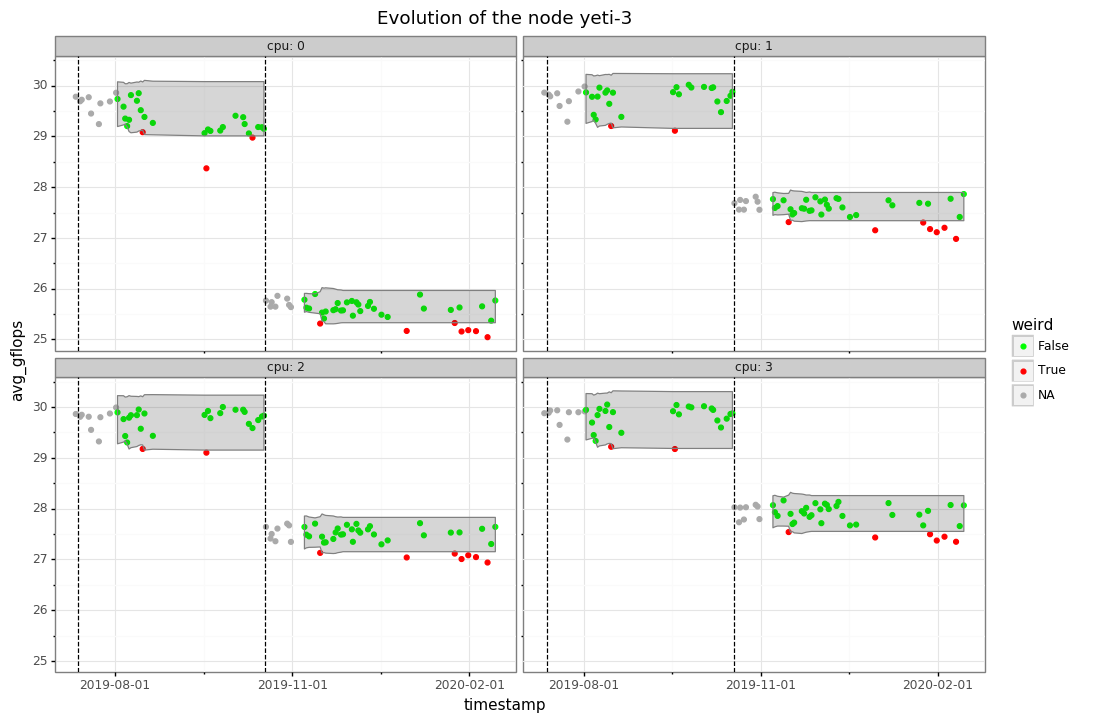

<ggplot: (8761190213054)>


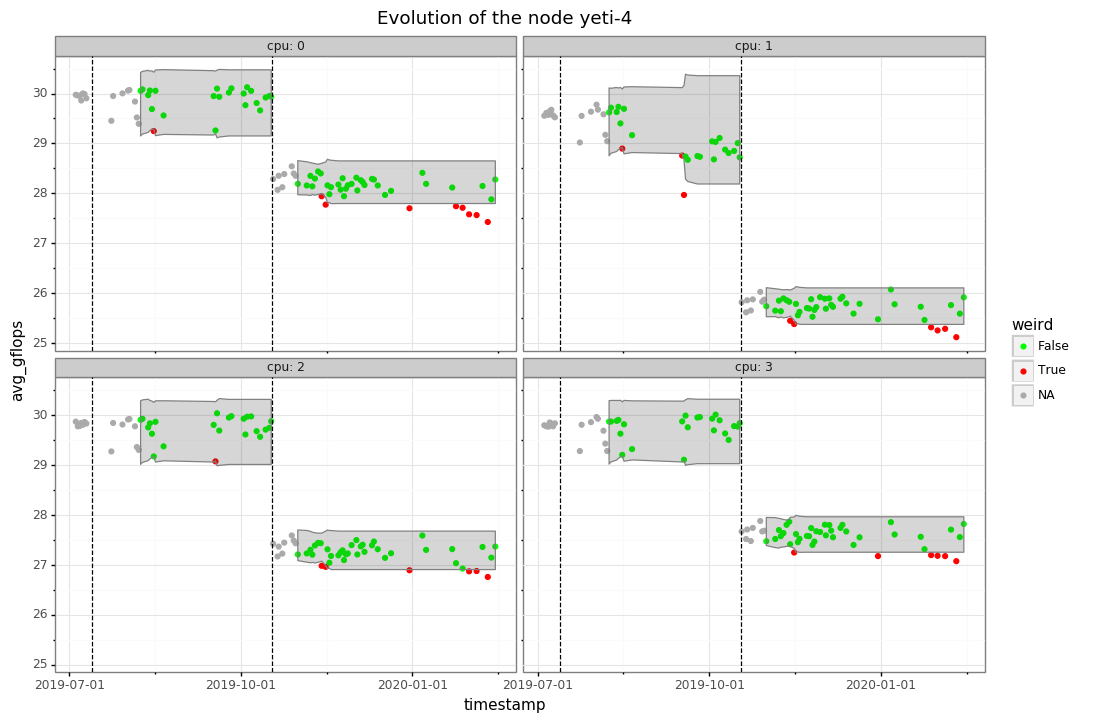

<ggplot: (-9223363275664532343)>


In [9]:
nrt.plot_evolution_cluster(marked, 'avg_gflops', changelog)